In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 22.3MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df["Class"].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
# le = LabelEncoder()
# df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
X = np.array(pd.get_dummies(df.iloc[:, :-1])).astype("float")
y = np.array(df['Class'])
y[y == 'M'] = 1
y[y == 'H'] = 1
y[y == 'L'] = 0

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# df.head(30)

In [ ]:
# X: Features, y: Classes
# X = np.array(df.iloc[:, :-1])
# y = np.array(df['Class'])

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


In [ ]:
y_train = y_train.reshape(y_train.shape[0], -1) #for making it (biz, 1)
y_val =  y_val.reshape(y_val.shape[0], -1)

In [ ]:
y_train = y_train.T
y_val = y_val.T
X_train = X_train.T
X_val = X_val.T
print("X_train: ",X_train.shape)
print("y_train: " ,y_train.shape)
print("X_val: " ,X_val.shape)
print("y_val:" ,y_val.shape)

X_train:  (72, 384)
y_train:  (1, 384)
X_val:  (72, 96)
y_val: (1, 96)


#**Implementing Model For 2-layer Random**

##Forward Propagation 2-layer Random'one

In [ ]:
# 1) Initializing parameters / using Xavier initialization
def initialize_parameter_2layer_Random(nx, ny):
  w = np.random.randn(nx, ny) * np.sqrt(2/(nx + ny)) #randoming with Xavier method w = (72, 1)
  b = np.random.randn(ny, 1) * np.sqrt(2 /(ny + 1)) #(1, 1)
  return w, b

In [ ]:
# 2) Implement sigmoid Function / The result of the activation function is basically the predicted output for the input features.
def sigmoid_2layer(z):
    z = z.astype(float)
    ans = 1 / (1 + np.exp(-z))
    return ans

In [ ]:
#3) implement forward propagation / Z and A
def calculate_forward_2layer(w, b, x):
  Z = np.dot(w.T, x) + b # (1, 384) = (1, 72)(72, 384) + (1,1)
  A = sigmoid_2layer(Z) 
  return A

In [ ]:
# 4) Calculate loss and cost / J = loss / sum of J's are cost
def calculate_cost_2layer(X_train, y_train, A):
  m = X_train.shape[1]
  A[A == 0.] = 1e-10 #problem with log(0), Add this little number to not get nan
  A[A == 1.] = 1. - 1e-10 #for second one (1 - A) to not get zero -> log(0) 
  loss = y_train * np.log(A) + (1 - y_train) * (np.log(1 - A))
  cost = (-1/m) * np.sum(loss)
  cost = np.squeeze(np.array(cost)) # this turns [[15]] into 15
  return cost

##backward Propagation 2-layer Random'one

In [ ]:
# 5) calculate dw, db
def gradient(X_train, y_train, A):
  m = X_train.shape[1]
  dw = (1/m) * np.dot(X_train, (A - y_train).T) # dJ/dw = dJ/da*da/dz*dz/dw - -y/a+1-y/1-a * a(1-a) * X
  db = (1/m) * np.sum(A - y_train) # dJ/db = dJ/da*da/dz*dz/db -y/a+1-y/1-a * a(1-a) * 1
  return dw, db 

In [ ]:
#6) updating data
def updates(w, b, dw, db, learning_rate):
  w = w - (learning_rate * dw)
  b = b - (learning_rate * db) 
  return w, b 

In [ ]:
#7 predict matrix
def predict_2layer(w, b, X):
    Y_prediction = np.zeros((1, X.shape[1])) #(1, m)
    w = w.reshape(X.shape[0], 1)
    A = calculate_forward_2layer(w, b, X) #calculate forward with new w and b
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0, i] > 0.5 else 0 #if it more than 0.5 it gets 1 else 0 / shape of that like y_train or y_val
    return Y_prediction, A

In [ ]:
def calculate_test_2layer(w, b, X_val, y_val):
  Y_prediction_val, Av =  predict_2layer(w, b, X_val) #predict val
  cost_v = calculate_cost_2layer(X_val, y_val, Av) # calculate cost val 
  accur_v = np.sum((Y_prediction_val == y_val)/X_val.shape[1]) * 100 #calculate accuracy val
  return cost_v, accur_v 

In [ ]:
def calculate_train_2layer(w, b, X_train, y_train):
  Y_prediction_train, A =  predict_2layer(w, b, X_train) #predict train
  accur_t = np.sum((Y_prediction_train == y_train)/X_train.shape[1]) * 100 #calculate accuracy train
  return accur_t

In [ ]:
def costomize(w, b, X_train, y_train, X_val, y_val, epoch, learning_rate,print_cost=False): 
    cost_train, accur_train, cost_val, accur_val = ([] for i in range(4)) #save this parts
    for i in range(epoch + 1):
        A = calculate_forward_2layer(w, b, X_train) # calculate A
        cost_t = calculate_cost_2layer(X_train, y_train, A) # calculate cost train
        dw, db = gradient(X_train, y_train, A) # output dw db
        w, b = updates(w, b, dw, db, learning_rate) # output new w b
        accur_t = calculate_train_2layer(w, b, X_train, y_train) # calculate accuracy of train
        cost_v, accur_v = calculate_test_2layer(w, b, X_val, y_val) # calculate accuracy and cost of test
        if i % 10 == 0:
            cost_train.append(cost_t)
            accur_train.append(accur_t / 100)
            cost_val.append(cost_v)
            accur_val.append(accur_v / 100)
            if print_cost:
                print(f"Cost iteration {i}: {cost_t}        train accuracy: {accur_t}")
                print("------------------------------------------------------------------------------------")
    return w, b, cost_train, accur_train, cost_val, accur_val

In [ ]:
def model_2layer_random(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    w, b = initialize_parameter_2layer_Random(X_train.shape[0], 1) #giving random value to b and w
    w, b, cost_train, accur_train, cost_val, accur_val = costomize(w, b, X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,"w" : w, "b" : b,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val 

# ***Training the model 2-layer Random***

In [ ]:
model_output_2layer_random, cost_val_r2, accur_val_r2 = model_2layer_random(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.6400730722838579        train accuracy: 66.14583333333333
------------------------------------------------------------------------------------
Cost iteration 10: 0.5955833302852289        train accuracy: 71.35416666666666
------------------------------------------------------------------------------------
Cost iteration 20: 0.5588632394228656        train accuracy: 73.4375
------------------------------------------------------------------------------------
Cost iteration 30: 0.5282133591510814        train accuracy: 76.04166666666667
------------------------------------------------------------------------------------
Cost iteration 40: 0.5023249290203399        train accuracy: 77.60416666666666
------------------------------------------------------------------------------------
Cost iteration 50: 0.4801969185570736        train accuracy: 79.16666666666666
------------------------------------------------------------------------------------
Cost iteration 60: 0.461064

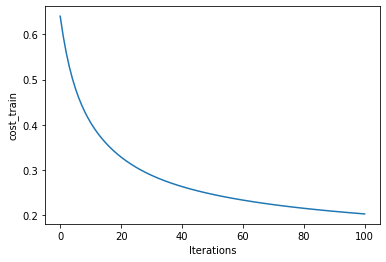

In [ ]:
plt.plot(model_output_2layer_random['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

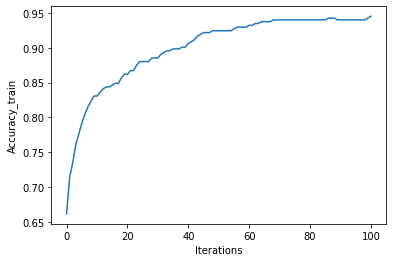

In [ ]:
plt.plot(np.squeeze(model_output_2layer_random['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

# ***Evaluating the model 2-layer Random***

In [ ]:
for i in range(len(cost_val_r2)):
    print(f"Cost iteration {i * 10}: {cost_val_r2[i]}        test accuracy: {accur_val_r2[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost iteration 0: 0.6038770496314403        test accuracy: 72.91666666666666
------------------------------------------------------------------------------------
Cost iteration 10: 0.5621358984627265        test accuracy: 73.95833333333334
------------------------------------------------------------------------------------
Cost iteration 20: 0.5275167993254398        test accuracy: 76.04166666666667
------------------------------------------------------------------------------------
Cost iteration 30: 0.49850708519298403        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost iteration 40: 0.47393720882536394        test accuracy: 81.25
------------------------------------------------------------------------------------
Cost iteration 50: 0.45290696042079737        test accuracy: 83.33333333333334
------------------------------------------------------------------------------------
Cost iteration 60: 0.4347228784636182      

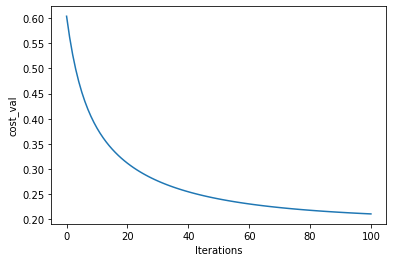

In [ ]:
plt.plot(cost_val_r2)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

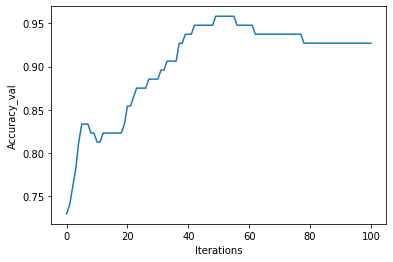

In [ ]:
plt.plot(accur_val_r2)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model 2-layer zero**

In [ ]:
#initialize 0 for params
def initialize_parameter_2layer_zero(nx, ny):
  w = np.zeros((nx, ny))
  b = np.zeros((ny, 1))
  return w, b

In [ ]:
def model_2layer_zero(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    w, b = initialize_parameter_2layer_zero(X_train.shape[0], 1)
    w, b, cost_train, accur_train, cost_val, accur_val = costomize(w, b, X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,"w" : w, "b" : b,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

# ***Training the model 2-layer zero***

In [ ]:
model_output_2layer_zero, cost_val_z2, accur_val_z2  = model_2layer_zero(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.6931471805599467        train accuracy: 83.85416666666667
------------------------------------------------------------------------------------
Cost iteration 10: 0.6322708001922316        train accuracy: 84.11458333333334
------------------------------------------------------------------------------------
Cost iteration 20: 0.585692401638279        train accuracy: 84.11458333333334
------------------------------------------------------------------------------------
Cost iteration 30: 0.5493373316037489        train accuracy: 84.375
------------------------------------------------------------------------------------
Cost iteration 40: 0.5203279313552738        train accuracy: 84.89583333333333
------------------------------------------------------------------------------------
Cost iteration 50: 0.49667008118366357        train accuracy: 85.15625
------------------------------------------------------------------------------------
Cost iteration 60: 0.4769815782763295

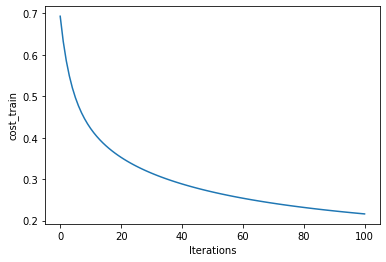

In [ ]:
plt.plot(model_output_2layer_zero['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

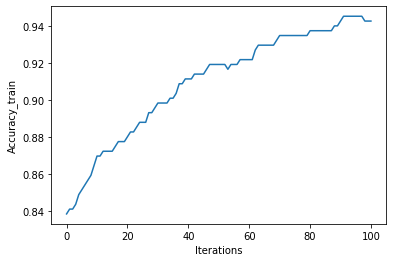

In [ ]:
plt.plot(np.squeeze(model_output_2layer_zero['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

# ***Evaluating the model 2-layer zero***

In [ ]:
for i in range(len(cost_val_z2)):
    print(f"Cost iteration {i * 10}: {cost_val_z2[i]}        test accuracy: {accur_val_z2[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost iteration 0: 0.6865354024782855        test accuracy: 79.16666666666667
------------------------------------------------------------------------------------
Cost iteration 10: 0.6291546786105271        test accuracy: 80.20833333333334
------------------------------------------------------------------------------------
Cost iteration 20: 0.5845395749860296        test accuracy: 80.20833333333334
------------------------------------------------------------------------------------
Cost iteration 30: 0.5491699686752869        test accuracy: 81.25
------------------------------------------------------------------------------------
Cost iteration 40: 0.5205444587162176        test accuracy: 82.29166666666667
------------------------------------------------------------------------------------
Cost iteration 50: 0.49691134442917556        test accuracy: 83.33333333333334
------------------------------------------------------------------------------------
Cost iteration 60: 0.4770408922527

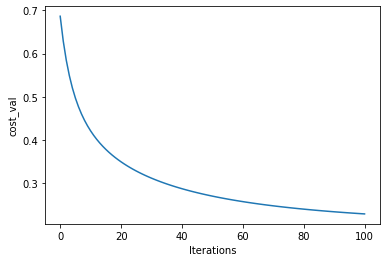

In [ ]:
plt.plot(cost_val_z2)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

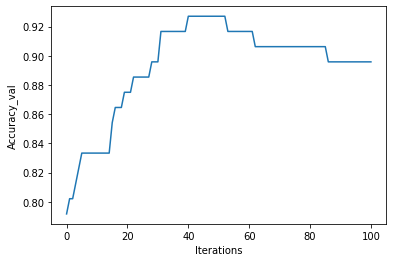

In [ ]:
plt.plot(accur_val_z2)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model For n-layer Random**

##Forward Propagation n-layer Random'one

In [ ]:
# 1) Initializing parameters
def initialize_parameter_layer_Random(layerlist):
  param = {} # for saving w and b
  for i in range(1, len(layerlist)):
    param["w" + str(i)] = np.random.randn(layerlist[i], layerlist[i - 1]) * np.sqrt(2/layerlist[i - 1])# # n(l), n(l-1)
    param["b" + str(i)] = np.random.randn(layerlist[i], 1) * np.sqrt(2/layerlist[i - 1])# # n(l), 1
  return param

In [ ]:
#2 implement Z
def calculate_Z_layer_Random(w, a, b):
  Z = np.dot(w, a) + b
  cache_forward = (w, a, b) #save w a b for each layer 
  return Z, cache_forward

In [ ]:
#3 relu function
def relu(Z):
    A = np.maximum(0,Z)
    cache_activation = Z #save z for each layer  
    return A, cache_activation

In [ ]:
#4 sigmoid function
def sigmoid(Z):
    Z = Z.astype(float)
    A = 1/(1+np.exp(-Z))
    cache_activation = Z #save z for each layer   
    return A, cache_activation

In [ ]:
#5 activation => 1 relu / 2 sigmoid / base
def base_activation_forward(w, a_minus, b, activation):
  if activation == 1:
    Z, cache_froward = calculate_Z_layer_Random(w, a_minus, b)
    A, cache_activation = relu(Z)
  elif activation == 2:
    Z, cache_froward = calculate_Z_layer_Random(w, a_minus, b)
    A, cache_activation = sigmoid(Z) 
  cache_saver = (cache_froward, cache_activation) #saving activation cache(Z) + forward cache(w, b, A)
  return A, cache_saver

In [ ]:
#6 repeat  previous function for n-1 layer
def forward_n(param, a_minus):
    caches = []
    A = a_minus
    Rangee = len(param) // 2 #in param you save w and b, be tedade w ya b ha laye darim dige! 
    for i in range(1, Rangee):  # number of layers in the neural network / l-1 Relu function
        A_prev = A
        wi, bi = param["w" + str(i)], param["b" + str(i)] #for making it ez to understand!
        A, cache_saver = base_activation_forward(wi, A_prev, bi, 1)
        caches.append(cache_saver)
    ws, bs = param["w" + str(Rangee)], param["b" + str(Rangee)] 
    AL, cach_last_layer = base_activation_forward(ws, A, bs, 2) #for last one sigmoid function
    caches.append(cach_last_layer)
    return AL, caches

In [ ]:
#7 Calculate loss and cost / J = loss / sum of J's are cost
def calculate_cost_nlayer(AL, y_train): # because of 0*log(0) gives nan 
  m = y_train.shape[1]
  AL[AL == 0.] = 1e-10
  AL[AL == 1.] = 1. - 1e-10 
  loss = y_train * np.log(AL) + (1 - y_train) * (np.log(1 - AL))
  cost = (-1/m) * np.sum(loss)
  cost = np.squeeze(np.array(cost))
  return cost

In [ ]:
# t1 = 0 * np.log(1e-10) + (1 - 0) * (np.log(1 - 1e-10)) #-1.000000082790371e-10
# #0 0 / 1 1
# t2 = 0 * np.log(1.- 1e-10) +  (1-0) * (np.log(1 - (1. - 1e-10))) #-23.02585084720009
# #0 1 / 1 0

##backward Propagation n-layer Random'one

In [ ]:
# dz = dA(L) * g'(z(L))
def sigmoid_backward(dA, cache_activation):
  Z = cache_activation
  Z = Z.astype(float)
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s) #a(1 - a) / dZ = dA(l) * g'(z(l))
  return dZ

In [ ]:
def relu_backward(dA, cache_activation):
    Z = cache_activation
    dZ = np.array(dA, copy=True) # #if Z >= 0 answer is 1 and when it's multiplying with dA => dA
    dZ[Z <= 0] = 0 # When z <= 0 answer => 0 / dZ = dA(l) * g'(z(l))
    return dZ

In [ ]:
def base_activation_backward(dA, cache_saver, activation):
    cache_froward, cache_activation = cache_saver
    # A_minus.shape[1] -> m 
    if activation == 1:
        dZ = relu_backward(dA, cache_activation)
        w, A_minus, b = cache_froward 
        dw = (1/A_minus.shape[1]) * np.dot(dZ, A_minus.T) #dw(l) = 1/m * dz(l) * A(l-1).T 
        db = (1/A_minus.shape[1]) * np.sum(dZ, axis=1, keepdims=True)  
        dA_minus = np.dot(w.T, dZ)  # dA(l-1) = w(l).T * dz(l)
    elif activation == 2:
        dZ = sigmoid_backward(dA, cache_activation)
        w, A_minus, b = cache_froward 
        dw = (1/A_minus.shape[1]) * np.dot(dZ, A_minus.T)
        db = (1/A_minus.shape[1]) * np.sum(dZ, axis=1, keepdims=True)  
        dA_minus = np.dot(w.T, dZ)
    return dA_minus, dw, db

In [ ]:
def backward_n(AL, y_train, caches):
    grads = {}
    dAL = -(np.divide(y_train, AL) - np.divide(1 - y_train, 1 - AL)) #first layer dj/da
    grads["dA" + str(len(caches)-1)], grads["dw" + str(len(caches))], grads["db" + str(len(caches))] = base_activation_backward(dAL, caches[len(caches) - 1], 2)   #len(caches) - 1 / index = 0, 1 / for sigmoid function
    for i in reversed(range((len(caches)-1))): #for l-1 layer relu 
        grads["dA" + str(i)], grads["dw" + str(i + 1)], grads["db" + str(i + 1)]  = base_activation_backward(grads["dA" + str(i + 1)], caches[i], 1)
    return grads

In [ ]:
def update_parameters(param, grads, learning_rate):
    parameters = param 
    Rangee = len(param) // 2
    for i in range(Rangee): # number of layers in the neural network
        parameters["w" + str(i+1)] = param["w" + str(i+1)] - (learning_rate * grads["dw" + str(i+1)])
        parameters["b" + str(i+1)] = param["b" + str(i+1)] - (learning_rate * grads["db" + str(i+1)])
    return parameters #updating in new dictionary

In [ ]:
def predict_nlayer(X_train, param):
    Y_prediction = np.zeros((1, X_train.shape[1])) #(1, m)
    AL,cache_forward = forward_n(param, X_train) #calculating forward propagation with new parameters of w and b 
    for i in range(AL.shape[1]):
      Y_prediction[0,i] = 1 if AL[0, i] > 0.5 else 0
    return Y_prediction, AL

In [ ]:
def calculate_test_nlayer(param, X_val, y_val):
  Y_prediction_val, Av = predict_nlayer(X_val, param) # calculate predication 
  cost_v = calculate_cost_nlayer(Av, y_val) # calculate cost of validation
  accur_v = np.sum((Y_prediction_val == y_val)/X_val.shape[1]) * 100 # calculate accuracy of validation
  return cost_v, accur_v

In [ ]:
def calculate_train_nlayer(param, X_train, y_train):
  Y_prediction_train, AL = predict_nlayer(X_train, param) # calculate predication
  accur_t = np.sum((Y_prediction_train == y_train)/X_train.shape[1]) * 100 # calculate accuracy of train
  return accur_t

In [ ]:
def costomize_nlayer(param, X_train, y_train, epoch, learning_rate, print_cost):
    cost_train, accur_train, cost_val, accur_val = ([] for i in range(4))
    for i in range(epoch + 1):
        AL, caches = forward_n(param, X_train) # calculate forward
        cost_t = calculate_cost_nlayer(AL, y_train) # calculate cost train 
        grads = backward_n(AL, y_train, caches) # grads -> dA / dw / db
        param = update_parameters(param, grads, learning_rate) #update w and b
        accur_t = calculate_train_nlayer(param, X_train, y_train) # calculate accuracy of train
        cost_v, accur_v = calculate_test_nlayer(param, X_val, y_val) # calculate accuracy and cost of test
        if print_cost and i % 10 == 0:
            cost_train.append(cost_t)
            accur_train.append(accur_t / 100)
            cost_val.append(cost_v)
            accur_val.append(accur_v / 100)
            print(f"Cost iteration {i}: {cost_t}        train accuracy: {accur_t}")
            print("------------------------------------------------------------------------------------")
    return param, cost_train, accur_train, cost_val, accur_val 

#**Implementing Model For 3-layer Random**

In [ ]:
def model_3layer_Random(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_Random([X_train.shape[0], 100,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

#***Training the model 3-layer Random***

In [ ]:
model_output_3layer_Random, cost_val_r3, accur_val_r3  = model_3layer_Random(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.9311508712518135        train accuracy: 46.09375
------------------------------------------------------------------------------------
Cost iteration 10: 0.7023128284910746        train accuracy: 58.59375
------------------------------------------------------------------------------------
Cost iteration 20: 0.5942432794536665        train accuracy: 68.48958333333333
------------------------------------------------------------------------------------
Cost iteration 30: 0.5282154536785489        train accuracy: 72.65625
------------------------------------------------------------------------------------
Cost iteration 40: 0.4813372440601179        train accuracy: 77.08333333333334
------------------------------------------------------------------------------------
Cost iteration 50: 0.4454789260999814        train accuracy: 78.90625
------------------------------------------------------------------------------------
Cost iteration 60: 0.4169792428275937        train ac

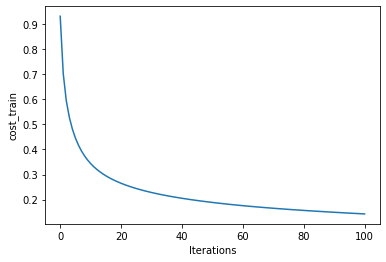

In [ ]:
plt.plot(model_output_3layer_Random['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

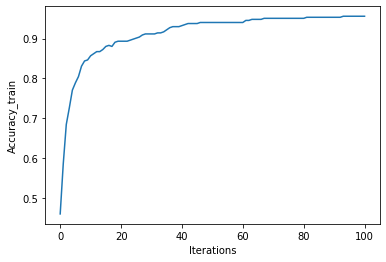

In [ ]:
plt.plot(np.squeeze(model_output_3layer_Random['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 3-layer Random***

In [ ]:
for i in range(len(cost_val_r3)):
    print(f"Cost iteration {i * 10}: {cost_val_r3[i]}        test accuracy: {accur_val_r3[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost iteration 0: 0.8760482932080298        test accuracy: 43.74999999999999
------------------------------------------------------------------------------------
Cost iteration 10: 0.6484174364209683        test accuracy: 65.625
------------------------------------------------------------------------------------
Cost iteration 20: 0.5460460192411426        test accuracy: 70.83333333333333
------------------------------------------------------------------------------------
Cost iteration 30: 0.48669876076756924        test accuracy: 73.95833333333333
------------------------------------------------------------------------------------
Cost iteration 40: 0.44599173536485204        test accuracy: 79.16666666666666
------------------------------------------------------------------------------------
Cost iteration 50: 0.4154273887809628        test accuracy: 79.16666666666667
------------------------------------------------------------------------------------
Cost iteration 60: 0.39134346586

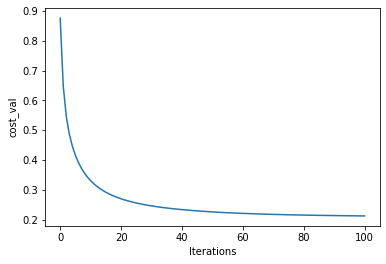

In [ ]:
plt.plot(cost_val_r3)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

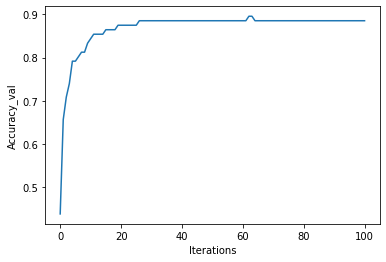

In [ ]:
plt.plot(accur_val_r3)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model 3-layer zero**

In [ ]:
# 1) Initializing parameters 
def initialize_parameter_layer_zero(layerlist): #use for 5layer zero too
  param = {} # for saving w and b
  for i in range(1, len(layerlist)): # 1 because of we do not count inputlayer
    param["w" + str(i)] = np.zeros((layerlist[i], layerlist[i - 1])) # n(l), n(l-1)
    param["b" + str(i)] = np.zeros((layerlist[i], 1)) # n(l), 1
  return param

In [ ]:
def model_3layer_zero(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_zero([X_train.shape[0], 100,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

# ***Training the model 3-layer zero***

In [ ]:
model_output_3layer_zero, cost_val_z3, accur_val_z3  = model_3layer_zero(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.6931471805599467        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 10: 0.6882488004441849        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 20: 0.6835895772859752        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 30: 0.6791577573415594        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 40: 0.6749421226199523        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 50: 0.6709319742140873        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 60

In [ ]:
print(model_output_3layer_zero["param"]["w1"].shape)
print(model_output_3layer_zero["param"]["w2"].shape)
print(model_output_3layer_zero["param"]["b1"].shape)
print(model_output_3layer_zero["param"]["b2"].shape)

(100, 72)
(1, 100)
(100, 1)
(1, 1)


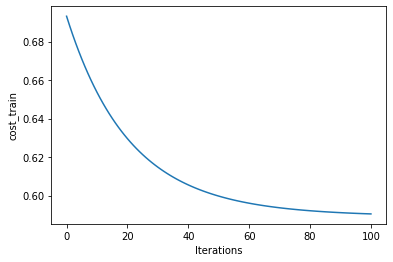

In [ ]:
plt.plot(model_output_3layer_zero['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

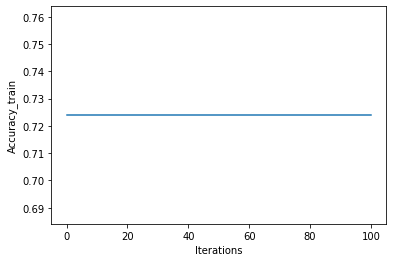

In [ ]:
plt.plot(np.squeeze(model_output_3layer_zero['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 3-layer zero***

In [ ]:
for i in range(len(cost_val_z3)):
    print(f"Cost after iteration {i * 10}: {cost_val_z3[i]}        test accuracy: {accur_val_z3[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost after iteration 0: 0.6925179247140014        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 10: 0.6863784206928282        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 20: 0.6805081549526878        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 30: 0.6748946438689425        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 40: 0.6695259515469411        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 50: 0.6643906736699502        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 60: 0.6594779206272907        te

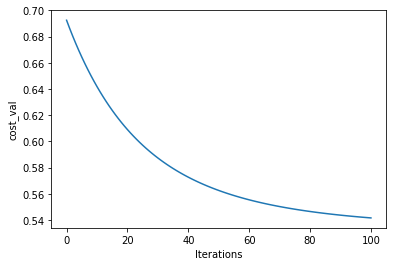

In [ ]:
plt.plot(cost_val_z3)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

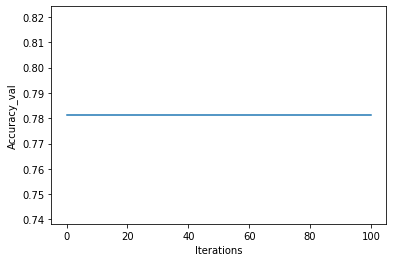

In [ ]:
plt.plot(accur_val_z3)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model For 5-layer Random**

In [ ]:
def model_5layer_Random(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_Random([X_train.shape[0], 50, 32, 16,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

#***Training the model 5-layer Random***

In [ ]:
model_output_5layer_Random, cost_val_r5, accur_val_r5 = model_5layer_Random(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.8013899218065826        train accuracy: 41.40624999999999
------------------------------------------------------------------------------------
Cost iteration 10: 0.7310648753839428        train accuracy: 49.479166666666664
------------------------------------------------------------------------------------
Cost iteration 20: 0.68291707099462        train accuracy: 57.03125
------------------------------------------------------------------------------------
Cost iteration 30: 0.64782991282858        train accuracy: 63.541666666666664
------------------------------------------------------------------------------------
Cost iteration 40: 0.6190401732447456        train accuracy: 69.53125
------------------------------------------------------------------------------------
Cost iteration 50: 0.5938229913698094        train accuracy: 71.875
------------------------------------------------------------------------------------
Cost iteration 60: 0.5700861187561291        tra

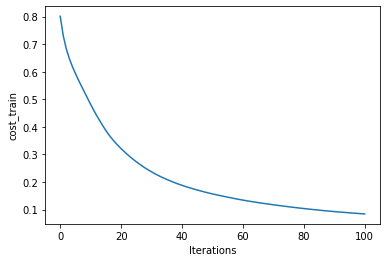

In [ ]:
plt.plot(model_output_5layer_Random['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

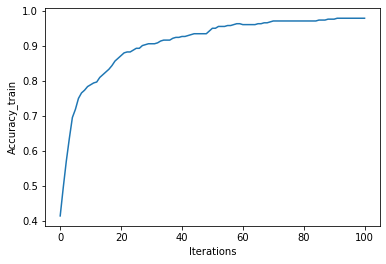

In [ ]:
plt.plot(np.squeeze(model_output_5layer_Random['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 5-layer Random***

In [ ]:
for i in range(len(cost_val_r5)):
    print(f"Cost after iteration {i * 10}: {cost_val_r5[i]}        test accuracy: {accur_val_r5[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost after iteration 0: 0.8001758553657564        test accuracy: 41.666666666666664
------------------------------------------------------------------------------------
Cost after iteration 10: 0.7259301033805705        test accuracy: 44.791666666666664
------------------------------------------------------------------------------------
Cost after iteration 20: 0.675010162954244        test accuracy: 51.041666666666664
------------------------------------------------------------------------------------
Cost after iteration 30: 0.6372789202325063        test accuracy: 61.45833333333333
------------------------------------------------------------------------------------
Cost after iteration 40: 0.6062206999628454        test accuracy: 62.5
------------------------------------------------------------------------------------
Cost after iteration 50: 0.5791751953507394        test accuracy: 68.75
------------------------------------------------------------------------------------
Cost after

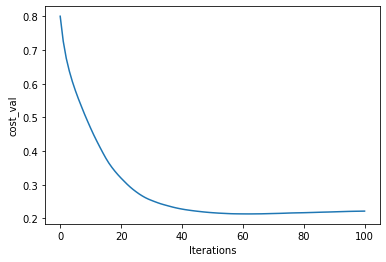

In [ ]:
plt.plot(cost_val_r5)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

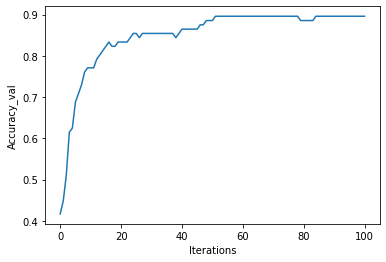

In [ ]:
plt.plot(accur_val_r5)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model For 5-layer zero**

In [ ]:
def model_5layer_zero(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_zero([X_train.shape[0], 50, 32, 16,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

#***Training the model 5-layer zero***

In [ ]:
model_output_5layer_zero, cost_val_z5, accur_val_z5 = model_5layer_zero(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.01, print_cost=True)

Cost iteration 0: 0.6931471805599467        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 10: 0.6882488004441849        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 20: 0.6835895772859752        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 30: 0.6791577573415594        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 40: 0.6749421226199523        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 50: 0.6709319742140873        train accuracy: 72.39583333333333
------------------------------------------------------------------------------------
Cost iteration 60

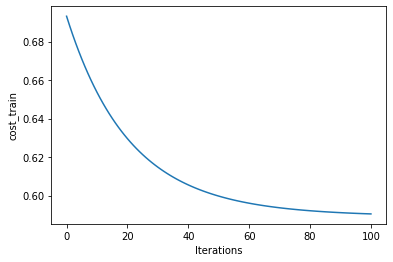

In [422]:
plt.plot(model_output_5layer_zero['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

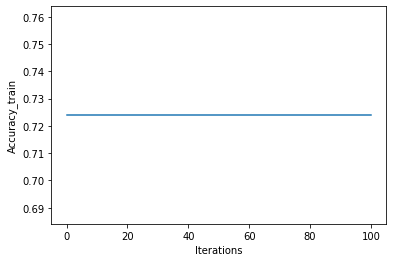

In [423]:
plt.plot(np.squeeze(model_output_5layer_zero['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 5-layer zero***

In [424]:
for i in range(len(cost_val_z5)):
    print(f"Cost after iteration {i * 10}: {cost_val_z5[i]}        test accuracy: {accur_val_z5[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost after iteration 0: 0.6925179247140014        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 10: 0.6863784206928282        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 20: 0.6805081549526878        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 30: 0.6748946438689425        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 40: 0.6695259515469411        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 50: 0.6643906736699502        test accuracy: 78.125
------------------------------------------------------------------------------------
Cost after iteration 60: 0.6594779206272907        te

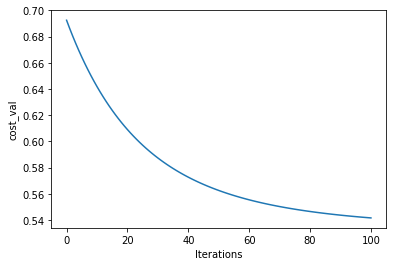

In [425]:
plt.plot(cost_val_z5)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

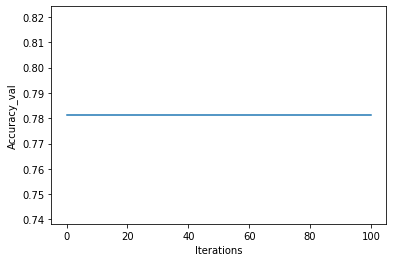

In [426]:
plt.plot(accur_val_z5)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#***IMPROVEMENT***

#**Changing epoch and learning rate**

# ***Training the model 2-layer Random - IMPROV1***

In [ ]:
model_output_2layer_randomv1, cost_val_r2v1, accur_val_r2v1 = model_2layer_random(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.03, print_cost=True)

Cost iteration 0: 1.1176089233925879        train accuracy: 38.541666666666664
------------------------------------------------------------------------------------
Cost iteration 10: 0.8689509434637193        train accuracy: 49.73958333333333
------------------------------------------------------------------------------------
Cost iteration 20: 0.7253416662051124        train accuracy: 60.9375
------------------------------------------------------------------------------------
Cost iteration 30: 0.6356441776581208        train accuracy: 67.44791666666666
------------------------------------------------------------------------------------
Cost iteration 40: 0.5740985720734253        train accuracy: 71.875
------------------------------------------------------------------------------------
Cost iteration 50: 0.5284354278542501        train accuracy: 75.0
------------------------------------------------------------------------------------
Cost iteration 60: 0.492543579208411        train 

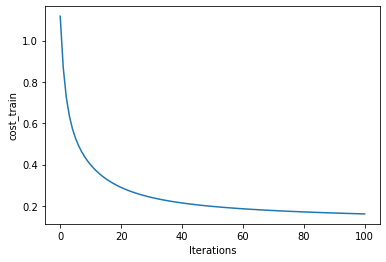

In [ ]:
plt.plot(model_output_2layer_randomv1['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

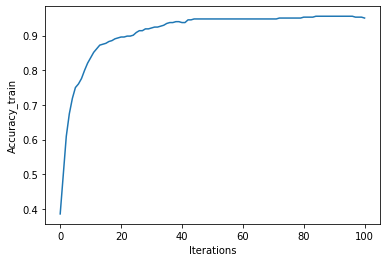

In [ ]:
plt.plot(np.squeeze(model_output_2layer_randomv1['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

# ***Evaluating the model 2-layer Random - IMPROV1***

In [ ]:
for i in range(len(cost_val_r2v1)):
    print(f"Cost iteration {i * 10}: {cost_val_r2v1[i]}        test accuracy: {accur_val_r2v1[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost iteration 0: 1.0379100957856662        test accuracy: 40.625
------------------------------------------------------------------------------------
Cost iteration 10: 0.8096841108194252        test accuracy: 53.125
------------------------------------------------------------------------------------
Cost iteration 20: 0.6742118672590334        test accuracy: 62.5
------------------------------------------------------------------------------------
Cost iteration 30: 0.5874348729759002        test accuracy: 67.70833333333333
------------------------------------------------------------------------------------
Cost iteration 40: 0.5271205685902098        test accuracy: 71.875
------------------------------------------------------------------------------------
Cost iteration 50: 0.48236983033904296        test accuracy: 72.91666666666666
------------------------------------------------------------------------------------
Cost iteration 60: 0.4475328132348316        test accuracy: 75.0
---

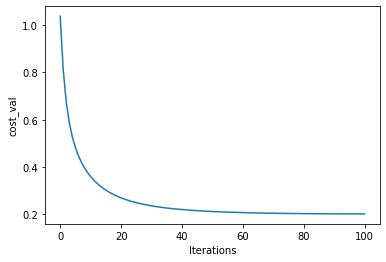

In [ ]:
plt.plot(cost_val_r2v1)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

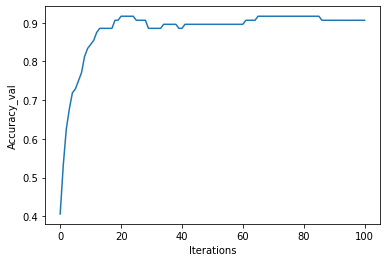

In [ ]:
plt.plot(accur_val_r2v1)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model For 3-layer Random - IMPROV1**

In [401]:
def model_3layer_Random_v1(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_Random([X_train.shape[0], 64,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

#***Training the model 3-layer Random - IMPROV1***

In [402]:
model_output_3layer_Randomv1, cost_val_r3v1, accur_val_r3v1  = model_3layer_Random_v1(X_train, y_train, X_val, y_val, epoch=1000, learning_rate= 0.1, print_cost=True)

Cost iteration 0: 0.8769088963933341        train accuracy: 58.072916666666664
------------------------------------------------------------------------------------
Cost iteration 10: 0.38362868439623515        train accuracy: 84.375
------------------------------------------------------------------------------------
Cost iteration 20: 0.29192667614204365        train accuracy: 91.14583333333334
------------------------------------------------------------------------------------
Cost iteration 30: 0.2475551087215741        train accuracy: 91.92708333333334
------------------------------------------------------------------------------------
Cost iteration 40: 0.21996012331612863        train accuracy: 93.48958333333334
------------------------------------------------------------------------------------
Cost iteration 50: 0.20012001450861144        train accuracy: 93.48958333333334
------------------------------------------------------------------------------------
Cost iteration 60: 0.18

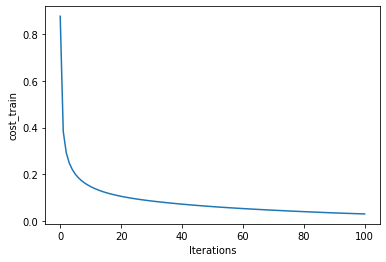

In [408]:
plt.plot(model_output_3layer_Randomv1['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

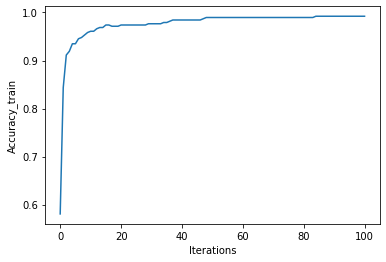

In [409]:
plt.plot(np.squeeze(model_output_3layer_Randomv1['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 3-layer Random - IMPROV1***

In [410]:
for i in range(len(cost_val_r3v1)):
    print(f"Cost iteration {i * 10}: {cost_val_r3v1[i]}        test accuracy: {accur_val_r3v1[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost iteration 0: 0.7289920431217777        test accuracy: 59.375
------------------------------------------------------------------------------------
Cost iteration 10: 0.38854185350708936        test accuracy: 81.25
------------------------------------------------------------------------------------
Cost iteration 20: 0.3089739220243424        test accuracy: 86.45833333333334
------------------------------------------------------------------------------------
Cost iteration 30: 0.26867540657843886        test accuracy: 87.5
------------------------------------------------------------------------------------
Cost iteration 40: 0.24465199308123264        test accuracy: 90.625
------------------------------------------------------------------------------------
Cost iteration 50: 0.22892126227796822        test accuracy: 90.625
------------------------------------------------------------------------------------
Cost iteration 60: 0.2180764817898905        test accuracy: 91.66666666666667

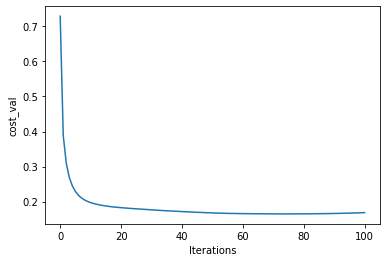

In [411]:
plt.plot(cost_val_r3v1)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

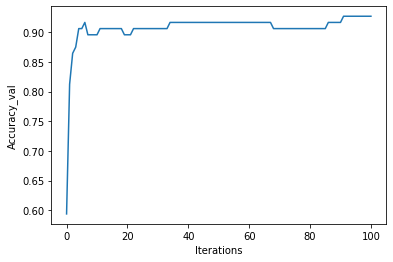

In [412]:
plt.plot(accur_val_r3v1)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()

#**Implementing Model For 5-layer Random - IMPROV1**

In [ ]:
def model_5layer_Random_v1(X_train, y_train, X_val, y_val, epoch, learning_rate, print_cost=False):
    param = initialize_parameter_layer_Random([X_train.shape[0], 50, 32, 16,  1])
    param, cost_train, accur_train, cost_val, accur_val = costomize_nlayer(param , X_train, y_train, epoch, learning_rate, print_cost)
    out = {"cost_train": cost_train,"accur_train": accur_train,  "param": param,"learning_rate" : learning_rate,"epoch": epoch}
    return out, cost_val, accur_val

#***Training the model 5-layer Random - IMPROV1***

In [415]:
model_output_5layer_Random_v1, cost_val_r5v1, accur_val_r5v1 = model_5layer_Random_v1(X_train, y_train, X_val, y_val, epoch=600, learning_rate= 0.1, print_cost=True)

Cost iteration 0: 1.2091980443937116        train accuracy: 50.78125
------------------------------------------------------------------------------------
Cost iteration 10: 0.5098302889343702        train accuracy: 75.26041666666666
------------------------------------------------------------------------------------
Cost iteration 20: 0.40503131815378823        train accuracy: 80.98958333333334
------------------------------------------------------------------------------------
Cost iteration 30: 0.30612962610111993        train accuracy: 89.0625
------------------------------------------------------------------------------------
Cost iteration 40: 0.23299315267663656        train accuracy: 92.96875
------------------------------------------------------------------------------------
Cost iteration 50: 0.18651355096148892        train accuracy: 94.79166666666667
------------------------------------------------------------------------------------
Cost iteration 60: 0.15713695657407725   

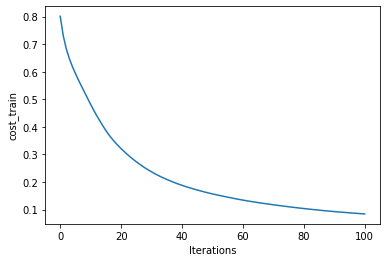

In [416]:
plt.plot(model_output_5layer_Random['cost_train'])
plt.ylabel('cost_train')
plt.xlabel('Iterations')
plt.show()

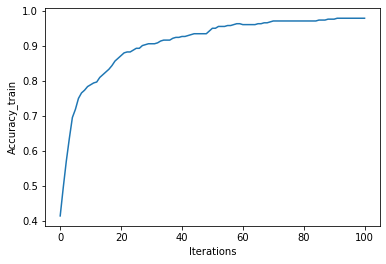

In [417]:
plt.plot(np.squeeze(model_output_5layer_Random['accur_train']))
plt.ylabel('Accuracy_train')
plt.xlabel('Iterations')
plt.show()

#***Evaluating the model 5-layer Random - IMPROV1***

In [418]:
for i in range(len(cost_val_r5v1)):
    print(f"Cost after iteration {i * 10}: {cost_val_r5v1[i]}        test accuracy: {accur_val_r5v1[i] * 100}")
    print("------------------------------------------------------------------------------------")

Cost after iteration 0: 0.7229621892130254        test accuracy: 59.375
------------------------------------------------------------------------------------
Cost after iteration 10: 0.44731879083621845        test accuracy: 81.25
------------------------------------------------------------------------------------
Cost after iteration 20: 0.36266208233576        test accuracy: 87.5
------------------------------------------------------------------------------------
Cost after iteration 30: 0.2864192346827889        test accuracy: 90.625
------------------------------------------------------------------------------------
Cost after iteration 40: 0.23529164649987178        test accuracy: 91.66666666666667
------------------------------------------------------------------------------------
Cost after iteration 50: 0.2107550580404206        test accuracy: 90.625
------------------------------------------------------------------------------------
Cost after iteration 60: 0.19841053788492935 

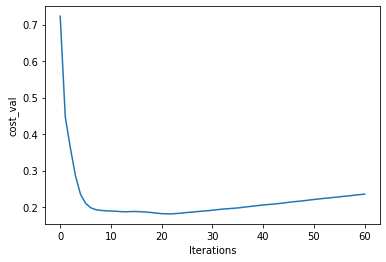

In [419]:
plt.plot(cost_val_r5v1)
plt.ylabel('cost_val')
plt.xlabel('Iterations')
plt.show()

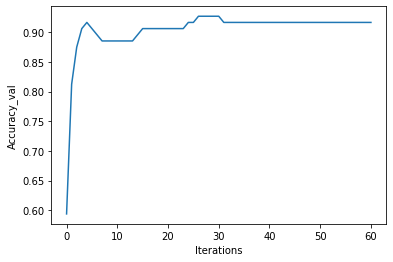

In [420]:
plt.plot(accur_val_r5v1)
plt.ylabel('Accuracy_val')
plt.xlabel('Iterations')
plt.show()